# Import Libraries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load DataSet

In [24]:
df=pd.read_csv("./drug200.csv")

In [25]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [27]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


# EDA

In [28]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [29]:
df.duplicated().sum()

0

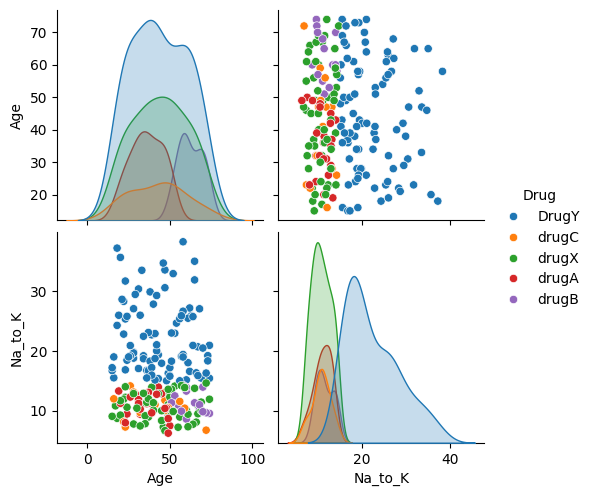

In [30]:
sns.pairplot(df, hue = "Drug")

In [31]:
df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

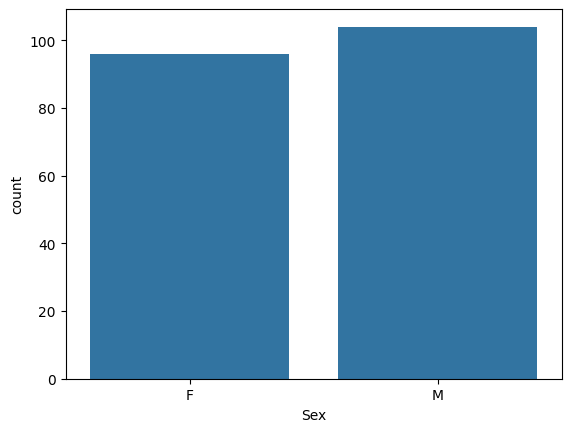

In [32]:
sns.countplot(x='Sex',data=df)

<Axes: xlabel='BP', ylabel='count'>

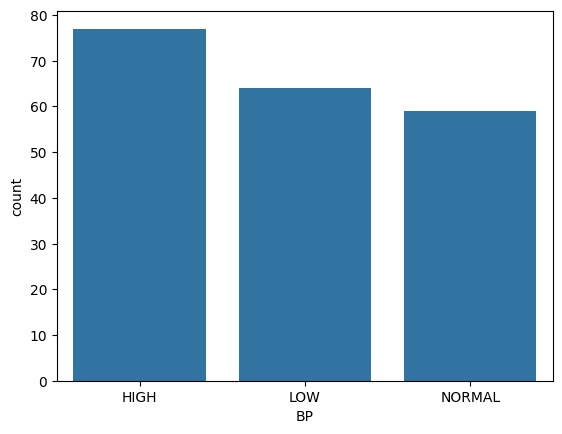

In [33]:
sns.countplot(x='BP',data=df)

<Axes: xlabel='BP', ylabel='count'>

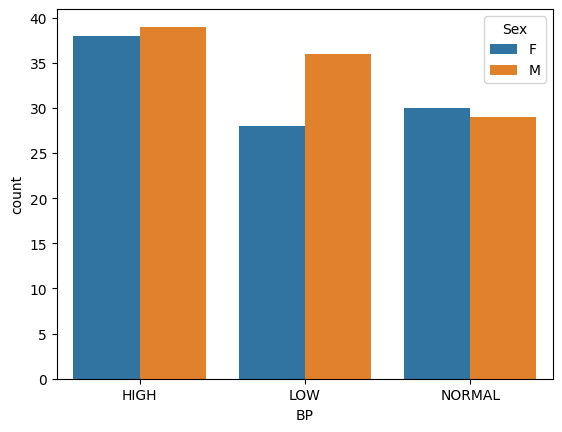

In [34]:
sns.countplot(x='BP',hue='Sex',data=df)

<Axes: xlabel='Cholesterol', ylabel='count'>

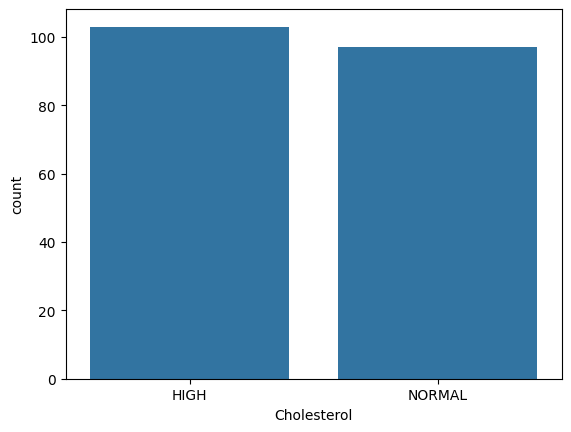

In [35]:
sns.countplot(x='Cholesterol',data=df)

<Axes: xlabel='Cholesterol', ylabel='count'>

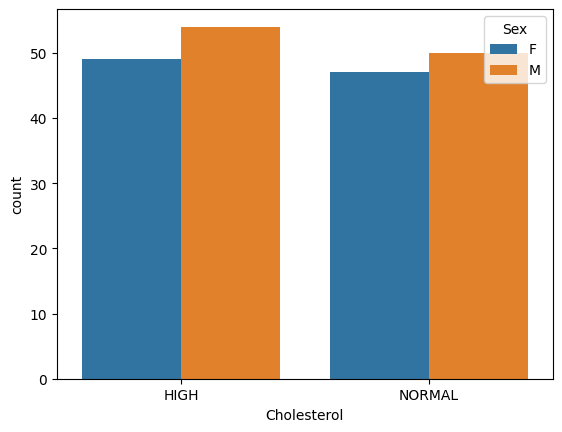

In [36]:
sns.countplot(x='Cholesterol',hue='Sex',data=df)

<Axes: xlabel='Drug', ylabel='count'>

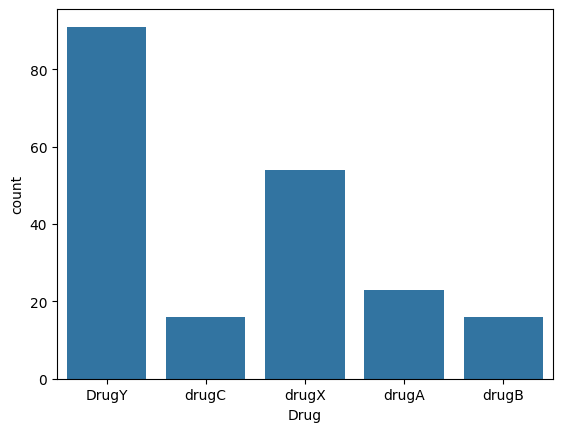

In [37]:
sns.countplot(x='Drug',data=df)

In [38]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.Cholesterol = le.fit_transform(df.Cholesterol)
df.BP = le.fit_transform(df.BP)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [40]:
X = df.drop('Drug', axis = 1)
y = df.Drug
X.shape,y.shape

((200, 5), (200,))

# Train Data & Test Data Split

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.2,random_state=23)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 5), (40, 5), (160,), (40,))

In [42]:
y_train

47     drugC
10     drugC
172    DrugY
44     drugX
128    DrugY
       ...  
91     DrugY
31     drugB
182    drugX
40     DrugY
83     drugA
Name: Drug, Length: 160, dtype: object

# Decision Tree Classifier

In [43]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

model =DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
def reports(y_test, y_pred):
    report = classification_report(y_test,y_pred, output_dict=True)
    data = pd.DataFrame(report).transpose()
    plt.subplot(121)
    plt.title('classification_report')
    sns.heatmap(data, cmap='Reds',annot=True)
    plt.subplot(122)
    plt.title('confusion_matrix')
    sns.heatmap(confusion_matrix(y_test,y_pred), cmap='Reds', annot=True)
    plt.show()

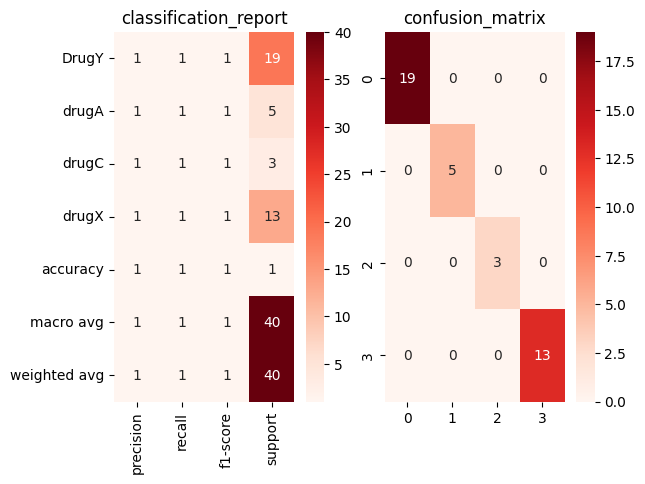

In [45]:
reports(y_test, y_pred)

[Text(0.625, 0.9, 'x[4] <= 14.829\ngini = 0.703\nsamples = 160\nvalue = [72, 18, 16, 13, 41]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.686\nsamples = 88\nvalue = [0, 18, 16, 13, 41]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.498\nsamples = 34\nvalue = [0, 18, 16, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [0, 18, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 16, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\ngini = 0.366\nsamples = 54\nvalue = [0, 0, 0, 13, 41]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\ngini = 0.499\nsamples = 27\nvalue = [0, 0, 0, 13, 14]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 0, 13, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [0, 0, 0, 0, 14]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 0, 0, 27]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 72\nvalue = [72, 0, 0, 0, 0]')]

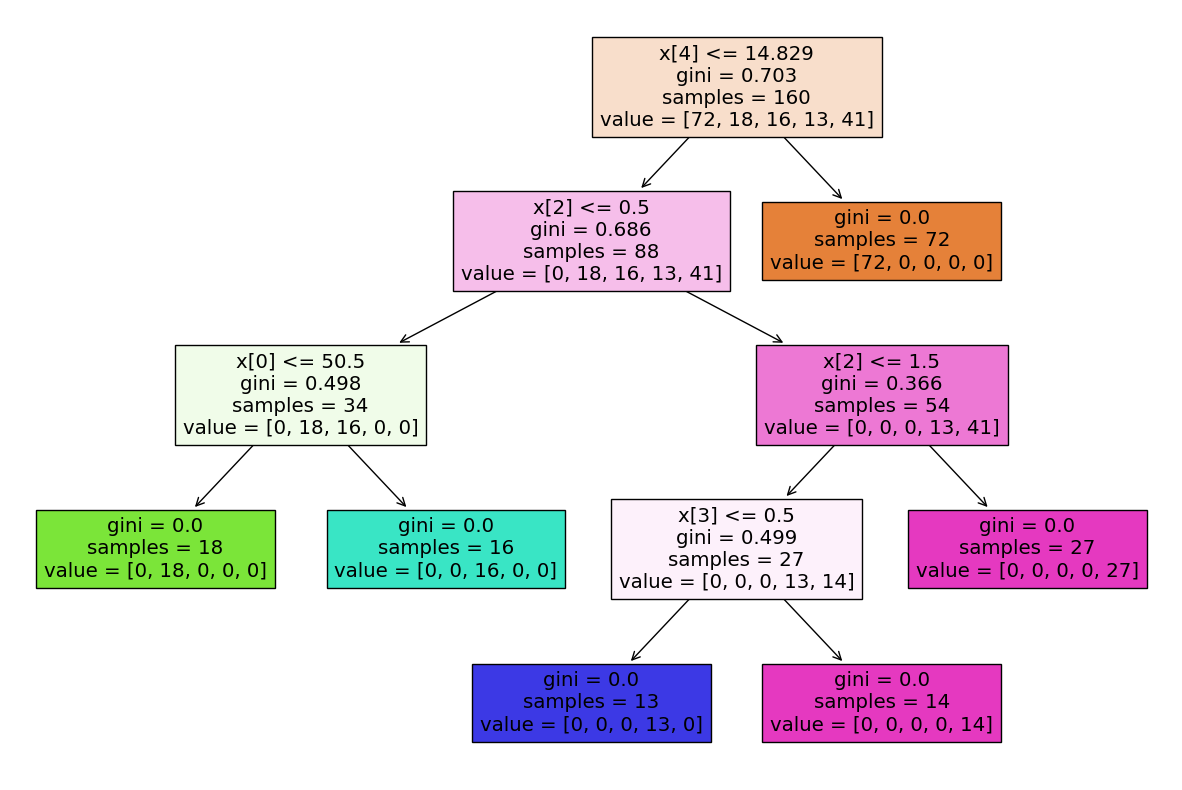

In [46]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [47]:
for i,v in zip(model.feature_names_in_,model.feature_importances_):
 print('Feature: %s, Score: %.5f' % (i,v))

Feature: Age, Score: 0.15071
Feature: Sex, Score: 0.00000
Feature: BP, Score: 0.26655
Feature: Cholesterol, Score: 0.11993
Feature: Na_to_K, Score: 0.46281


# Decision Tree Classifier With Gini

In [48]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

model_with_gini =DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
model_with_gini.fit(X_train,y_train)
y_pred_with_gini = model_with_gini.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_with_gini)))

Training-set accuracy score: 0.9250


[Text(0.625, 0.875, 'x[4] <= 14.829\ngini = 0.703\nsamples = 160\nvalue = [72, 18, 16, 13, 41]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.686\nsamples = 88\nvalue = [0, 18, 16, 13, 41]'),
 Text(0.25, 0.375, 'x[0] <= 50.5\ngini = 0.498\nsamples = 34\nvalue = [0, 18, 16, 0, 0]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 18\nvalue = [0, 18, 0, 0, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 16, 0, 0]'),
 Text(0.75, 0.375, 'x[2] <= 1.5\ngini = 0.366\nsamples = 54\nvalue = [0, 0, 0, 13, 41]'),
 Text(0.625, 0.125, 'gini = 0.499\nsamples = 27\nvalue = [0, 0, 0, 13, 14]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 0, 0, 27]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 72\nvalue = [72, 0, 0, 0, 0]')]

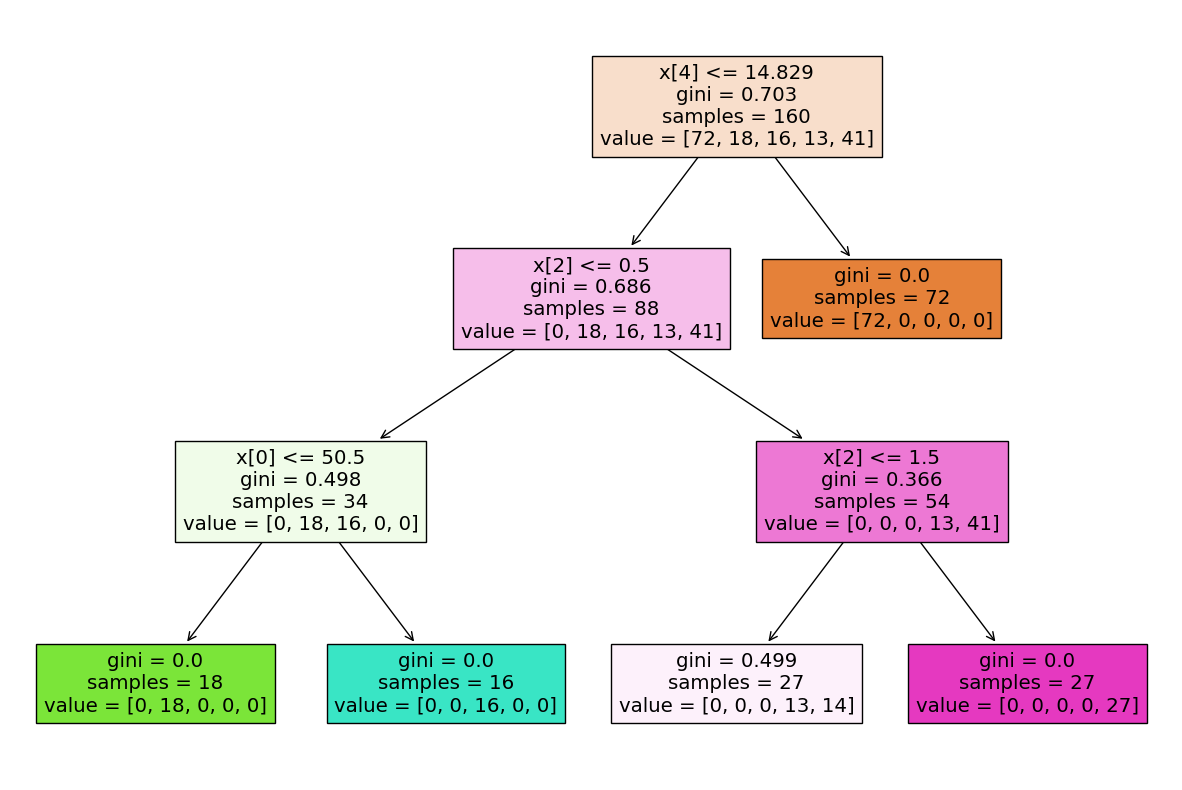

In [50]:
plt.figure(figsize=(15,10))
tree.plot_tree(model_with_gini,filled=True)

# DecisionTreeClassifier With Entropy

In [51]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

model_with_entropy =DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
model_with_entropy.fit(X_train,y_train)
y_pred_with_entropy = model_with_entropy.predict(X_test)

In [52]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_with_entropy)))

Model accuracy score with criterion entropy: 0.9250


[Text(0.625, 0.875, 'x[4] <= 14.829\nentropy = 2.003\nsamples = 160\nvalue = [72, 18, 16, 13, 41]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\nentropy = 1.836\nsamples = 88\nvalue = [0, 18, 16, 13, 41]'),
 Text(0.25, 0.375, 'x[0] <= 50.5\nentropy = 0.998\nsamples = 34\nvalue = [0, 18, 16, 0, 0]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 18\nvalue = [0, 18, 0, 0, 0]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 16\nvalue = [0, 0, 16, 0, 0]'),
 Text(0.75, 0.375, 'x[2] <= 1.5\nentropy = 0.796\nsamples = 54\nvalue = [0, 0, 0, 13, 41]'),
 Text(0.625, 0.125, 'entropy = 0.999\nsamples = 27\nvalue = [0, 0, 0, 13, 14]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 0, 0, 27]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 72\nvalue = [72, 0, 0, 0, 0]')]

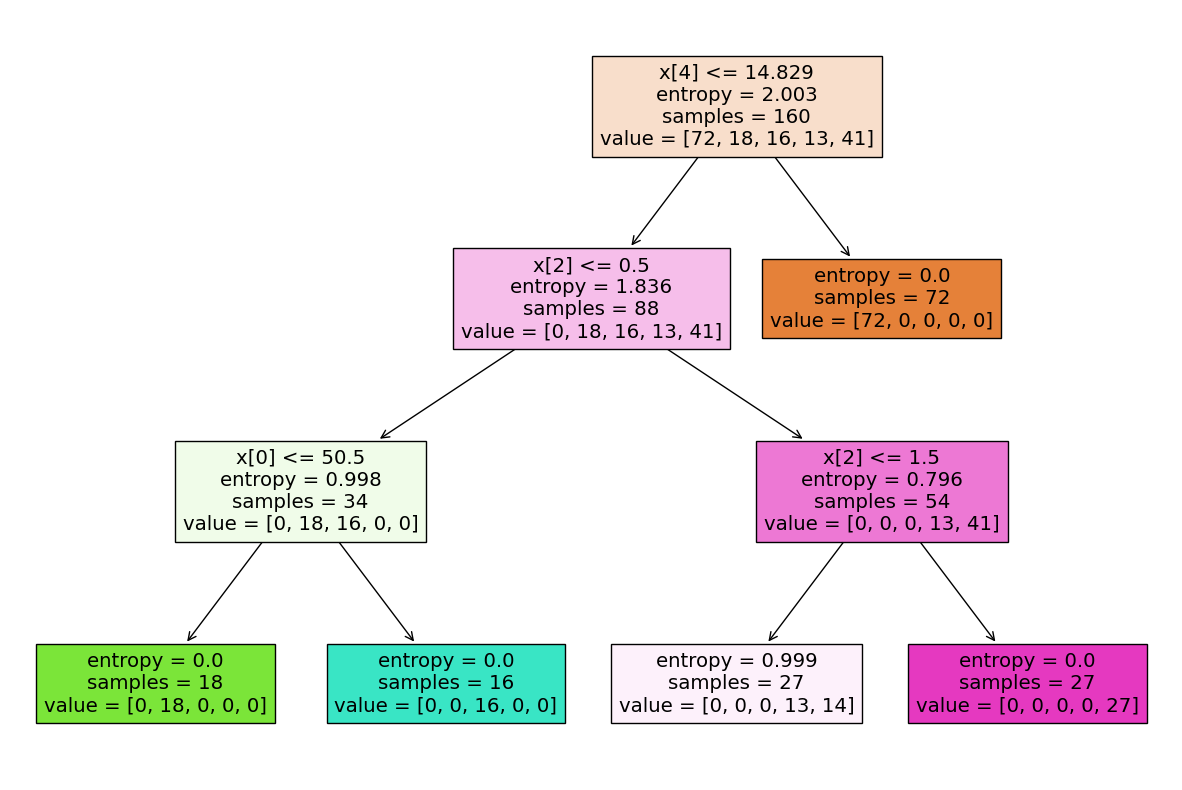

In [53]:
plt.figure(figsize=(15,10))
tree.plot_tree(model_with_entropy,filled=True)

# Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
RFC =RandomForestClassifier()
RFC.fit(X_train,y_train)
RFC_y_pred = RFC.predict(X_test)

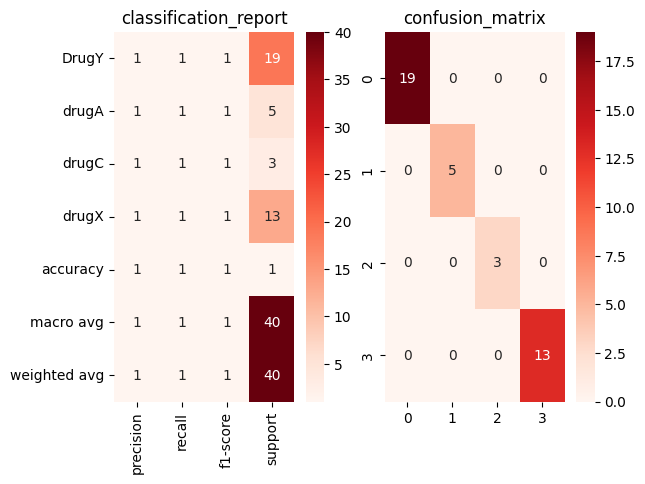

In [55]:
reports(y_test, RFC_y_pred)

In [56]:
for i,v in zip(RFC.feature_names_in_,RFC.feature_importances_):
 print('Feature: %s, Score: %.5f' % (i,v))

Feature: Age, Score: 0.15858
Feature: Sex, Score: 0.01254
Feature: BP, Score: 0.23277
Feature: Cholesterol, Score: 0.05447
Feature: Na_to_K, Score: 0.54165
